# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset

In [2]:
data = pd.read_csv('Exam Scores Data.csv')
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Exploratory Data Analysis(EDA)

In [3]:
data.shape

(30641, 15)

In [4]:
data.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30641.0,499.556607,288.747894,0.0,249.0,500.0,750.0,999.0
NrSiblings,29069.0,2.145894,1.458242,0.0,1.0,2.0,3.0,7.0
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0


### Dropping a column

In [8]:
data = data.drop('Unnamed: 0', axis=1)

### Counting the values

In [9]:
data["TransportMeans"].value_counts()

TransportMeans
school_bus    16145
private       11362
Name: count, dtype: int64

In [10]:
data["ParentEduc"].value_counts()

ParentEduc
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: count, dtype: int64

In [11]:
data["ParentMaritalStatus"].value_counts()

ParentMaritalStatus
married     16844
single       7097
divorced     4919
widowed       591
Name: count, dtype: int64

In [12]:
data["MathScore"].value_counts()

MathScore
64    890
67    814
71    797
70    787
63    762
     ... 
12      2
14      2
0       1
8       1
7       1
Name: count, Length: 95, dtype: int64

In [13]:
data["IsFirstChild"].value_counts()

IsFirstChild
yes    19082
no     10655
Name: count, dtype: int64

In [14]:
data["NrSiblings"].value_counts()

NrSiblings
1.0    8217
2.0    6790
3.0    6123
0.0    3085
4.0    2941
5.0    1320
6.0     302
7.0     291
Name: count, dtype: int64

In [15]:
data.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [16]:
#Changing float to an integer
data['NrSiblings'] = data['NrSiblings'].fillna(0).astype(int)

In [17]:
data.dtypes

Gender                 object
EthnicGroup            object
ParentEduc             object
LunchType              object
TestPrep               object
ParentMaritalStatus    object
PracticeSport          object
IsFirstChild           object
NrSiblings              int32
TransportMeans         object
WklyStudyHours         object
MathScore               int64
ReadingScore            int64
WritingScore            int64
dtype: object

### Check for Duplicated Data

In [18]:
data.duplicated().sum()

0

### Check for Null Values

In [19]:
data.isnull().any()

Gender                 False
EthnicGroup             True
ParentEduc              True
LunchType              False
TestPrep                True
ParentMaritalStatus     True
PracticeSport           True
IsFirstChild            True
NrSiblings             False
TransportMeans          True
WklyStudyHours          True
MathScore              False
ReadingScore           False
WritingScore           False
dtype: bool

### Drop all null values

In [20]:
data = data.dropna()
data.tail()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30635,male,group C,some college,standard,none,married,regularly,no,2,school_bus,5 - 10,58,53,49
30636,female,group D,high school,standard,none,single,sometimes,no,2,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1,private,5 - 10,58,53,51
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3,school_bus,5 - 10,82,90,93
30640,male,group B,some college,standard,none,married,never,no,1,school_bus,5 - 10,64,60,58


## Convert numerical features into categorical features

In [21]:
df = data['IsFirstChild'].replace(['yes', 'no'], [1,0], inplace = True)
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,1,4,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,1,0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,1,1,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,0,1,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,1,1,private,> 10,41,43,39


In [22]:
df= data['TestPrep'].replace(['none', 'completed'], [0,1], inplace = True) 
data.tail()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30635,male,group C,some college,standard,0,married,regularly,0,2,school_bus,5 - 10,58,53,49
30636,female,group D,high school,standard,0,single,sometimes,0,2,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,0,single,regularly,0,1,private,5 - 10,58,53,51
30639,female,group D,associate's degree,standard,1,married,regularly,0,3,school_bus,5 - 10,82,90,93
30640,male,group B,some college,standard,0,married,never,0,1,school_bus,5 - 10,64,60,58


In [23]:
df = data['TransportMeans'].replace(['school_bus', 'private'], [0,1], inplace= True)
df = data['LunchType'].replace(['free/reduced','standard'], [0,1], inplace = True)
df = data['Gender'].replace(['male', 'female'], [0,1], inplace= True)
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,1,group B,master's degree,1,0,single,sometimes,1,4,0,< 5,87,93,91
4,0,group C,some college,1,0,married,sometimes,1,0,0,5 - 10,76,78,75
5,1,group B,associate's degree,1,0,married,regularly,1,1,0,5 - 10,73,84,79
6,1,group B,some college,1,1,widowed,never,0,1,1,5 - 10,85,93,89
7,0,group B,some college,0,0,married,sometimes,1,1,1,> 10,41,43,39


### Value counts after dropping all null values

In [24]:
data['ParentEduc'].value_counts()

ParentEduc
some college          4637
high school           3982
associate's degree    3963
some high school      3851
bachelor's degree     2421
master's degree       1412
Name: count, dtype: int64

In [25]:
data['LunchType'].value_counts()

LunchType
1    13123
0     7143
Name: count, dtype: int64

In [26]:
data['EthnicGroup'].value_counts()

EthnicGroup
group C    6484
group D    5252
group B    4116
group E    2862
group A    1552
Name: count, dtype: int64

In [27]:
data['TransportMeans'].value_counts()

TransportMeans
0    11860
1     8406
Name: count, dtype: int64

# Data Visualization

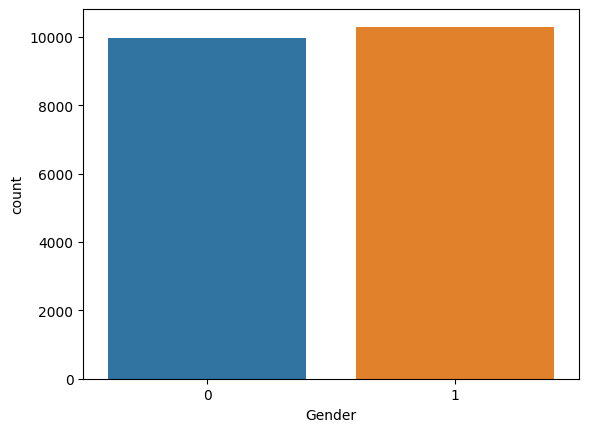

In [28]:
#Bar Graph
sns.countplot(x='Gender', data=data)
plt.show()

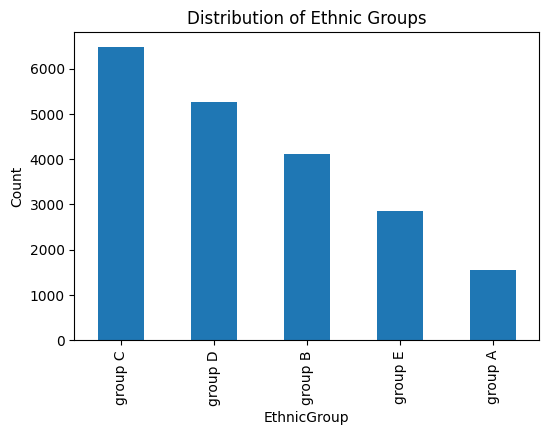

In [29]:
plt.figure(figsize=(6,4))
data['EthnicGroup'].value_counts().plot(kind ='bar')
plt.ylabel('Count')
plt.title('Distribution of Ethnic Groups')
plt.show()

In [30]:
from sklearn import preprocessing

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
# df = data.copy(deep = True)
# oh = OneHotEncoder()
# df['EthnicGroup'] = oh.fit_transform(df['EthnicGroup'])

In [33]:
data = pd.get_dummies(data, columns=["EthnicGroup", "ParentMaritalStatus","ParentEduc","PracticeSport", "WklyStudyHours"], dtype=int)

In [34]:
data.head()

,Gender,LunchType,TestPrep,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore,EthnicGroup_group A,...,ParentEduc_high school,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
2,1,1,0,1,4,0,87,93,91,0,...,0,1,0,0,0,0,1,0,1,0
4,0,1,0,1,0,0,76,78,75,0,...,0,0,1,0,0,0,1,1,0,0
5,1,1,0,1,1,0,73,84,79,0,...,0,0,0,0,0,1,0,1,0,0
6,1,1,1,0,1,1,85,93,89,0,...,0,0,1,0,1,0,0,1,0,0
7,0,0,0,1,1,1,41,43,39,0,...,0,0,1,0,0,0,1,0,0,1


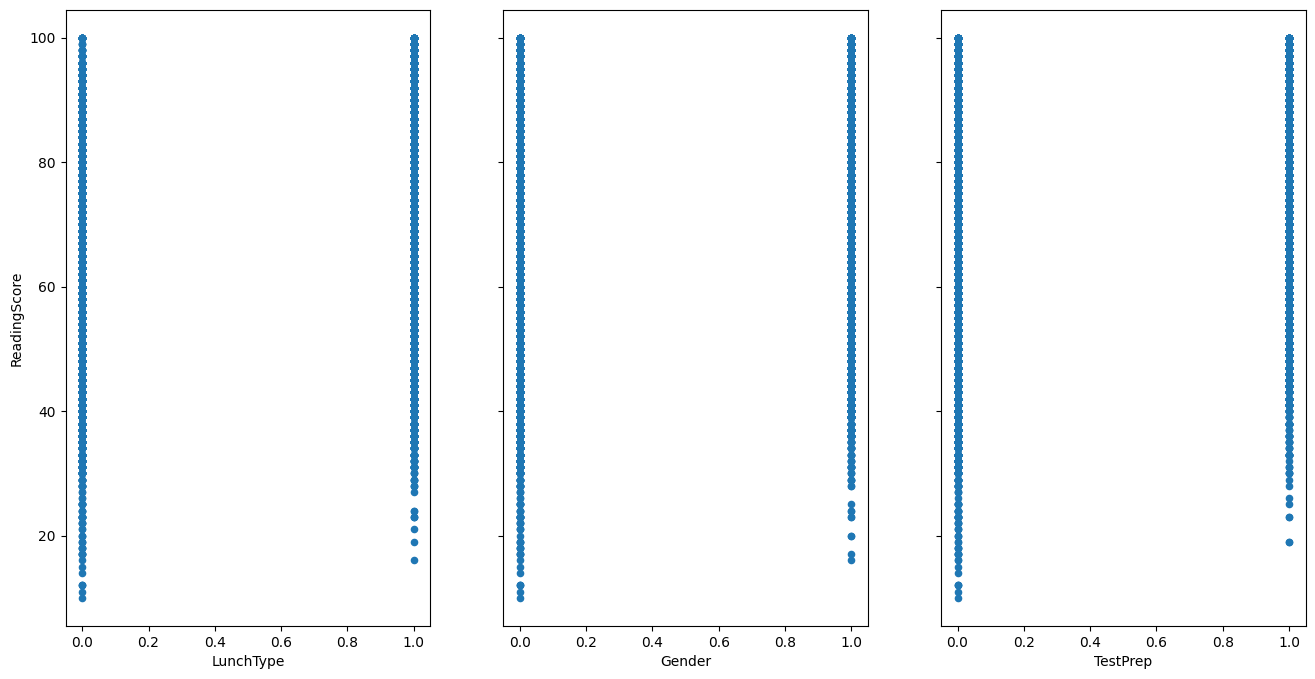

In [35]:
fig, axs = plt.subplots(1,3, sharey= True)
data.plot(kind = "scatter", x= 'LunchType', y='ReadingScore', ax = axs[0],figsize=(16,8))
data.plot(kind = "scatter", x= 'Gender', y ='ReadingScore', ax= axs[1],figsize=(16,8))
data.plot(kind = "scatter", x='TestPrep', y ='ReadingScore',ax= axs[2],figsize=(16,8)) 
plt.show()

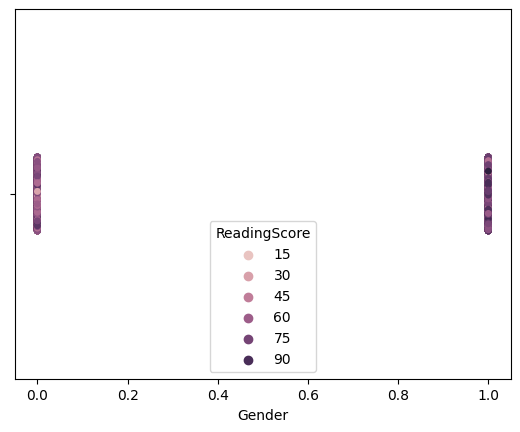

In [36]:
sns.stripplot(data = data, x="Gender", hue="ReadingScore", edgecolor='black')
plt.show()

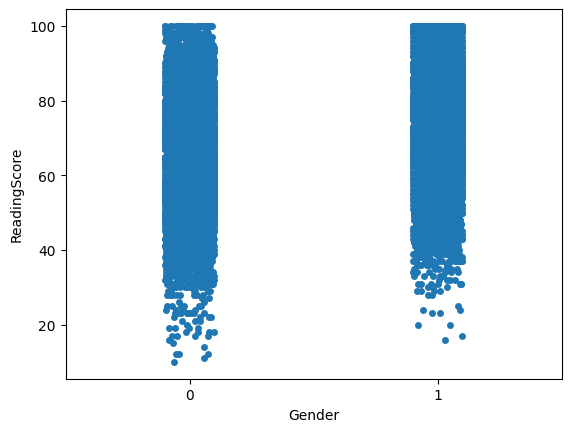

In [37]:
sns.stripplot(data=data, x="Gender", y="ReadingScore")
plt.show()

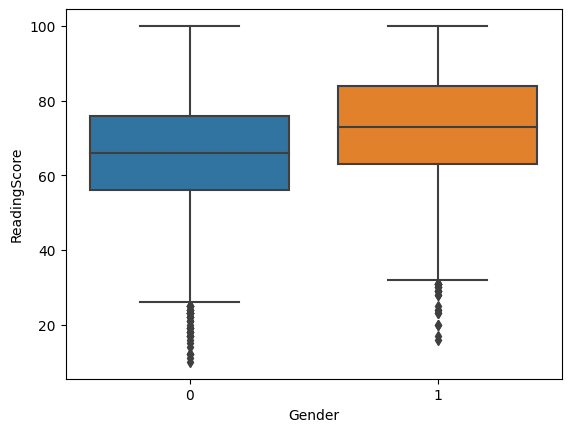

In [38]:
#Box Plot
sns.boxplot(data=data, x="Gender", y="ReadingScore")
plt.show()

# Feature Engineering

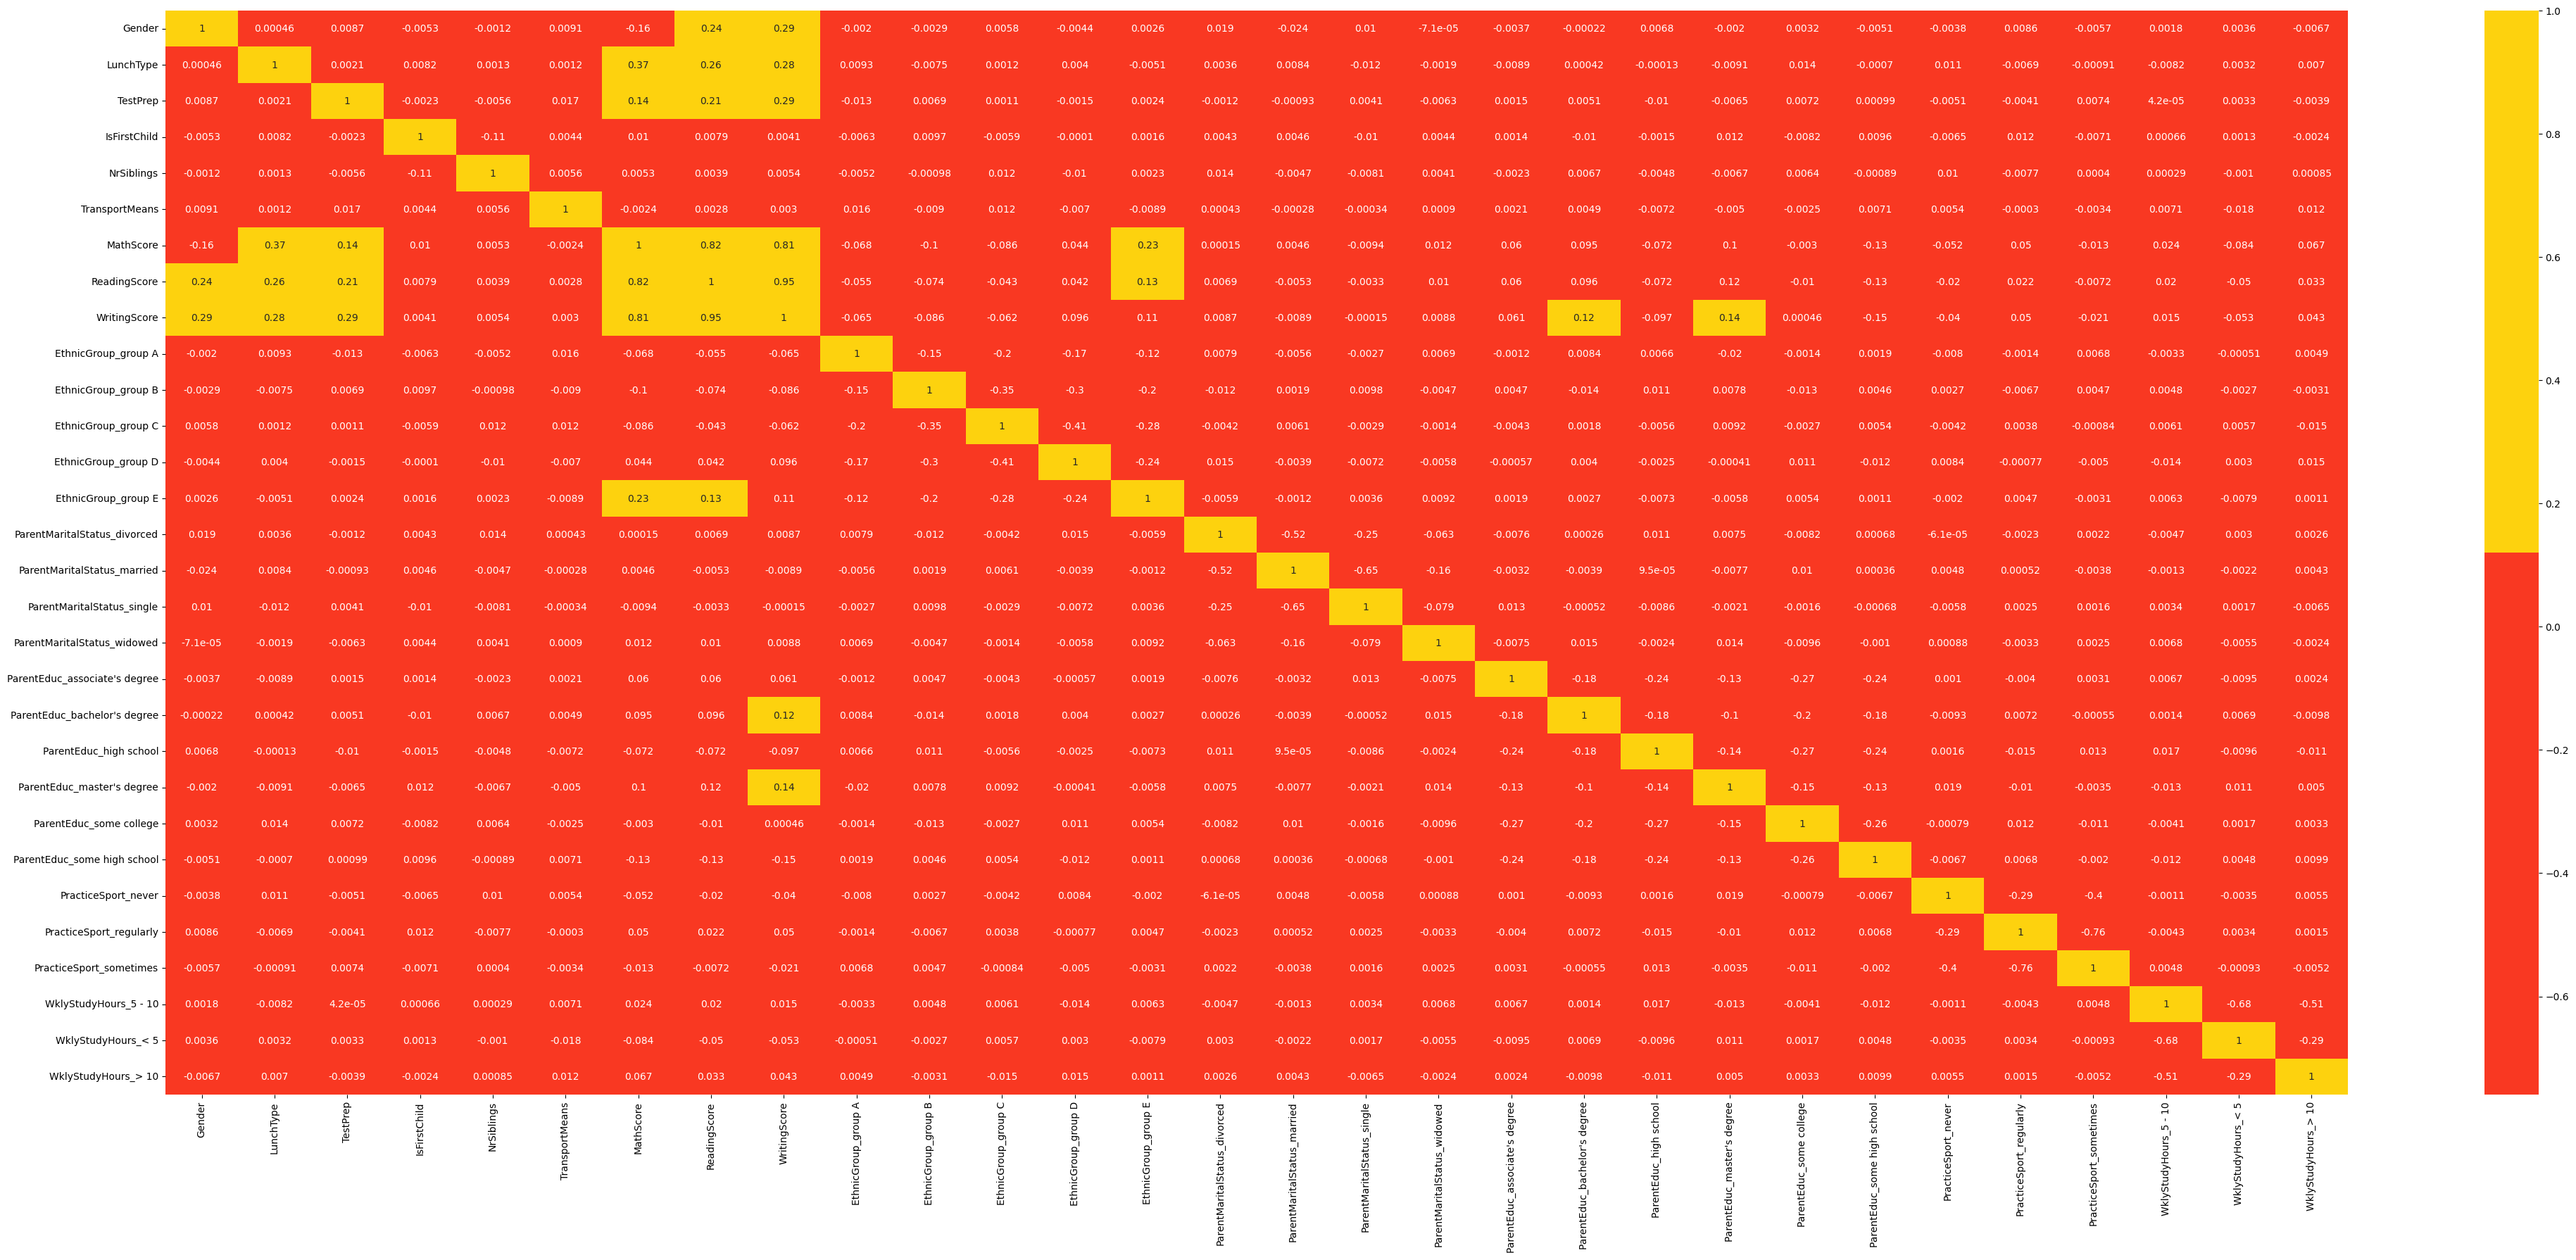

In [53]:
#Heat map
colors = ['#F93822','#FDD20E']
plt.figure(figsize = (50,20))
sns.heatmap(data.corr(), cmap = colors, annot = True)
plt.show()

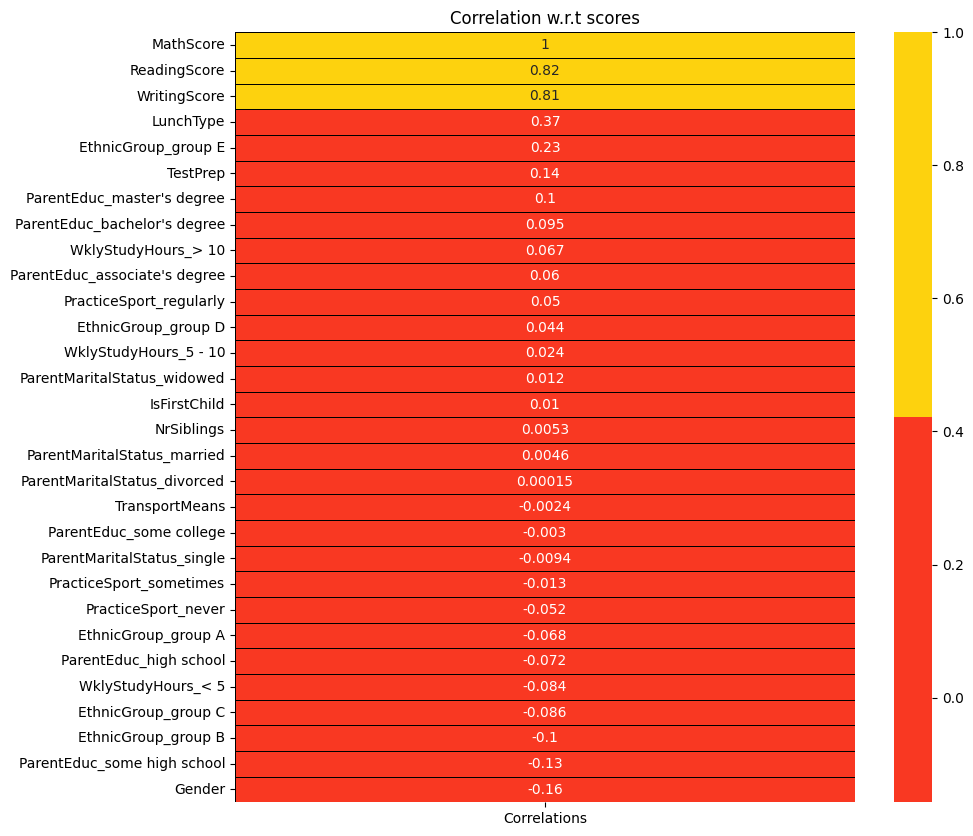

In [54]:
corr = data.corrwith(data['MathScore']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (10, 10))
sns.heatmap(corr, annot= True, cmap=colors, linewidths = 0.4, linecolor = 'black')
plt.title('Correlation w.r.t scores')
plt.show()

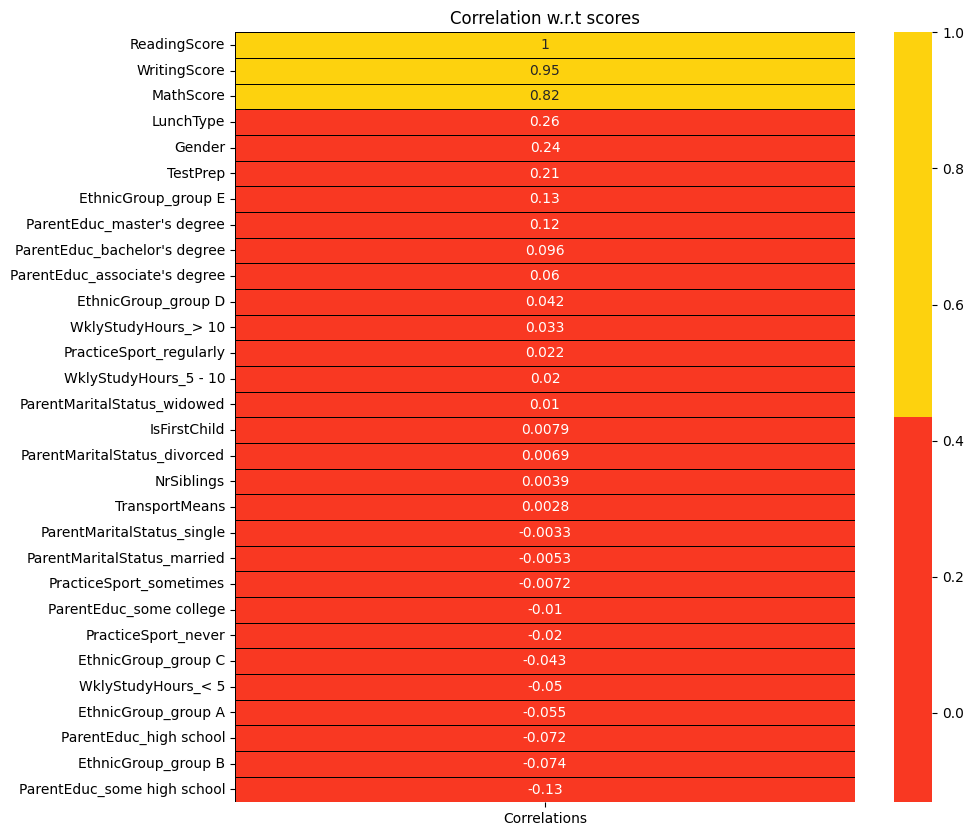

In [55]:
corr = data.corrwith(data['ReadingScore']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot= True, cmap=colors, linewidths = 0.4, linecolor = 'black')
plt.title('Correlation w.r.t scores')
plt.show()

Text(0.5, 1.0, 'Correlation w.r.t scores')

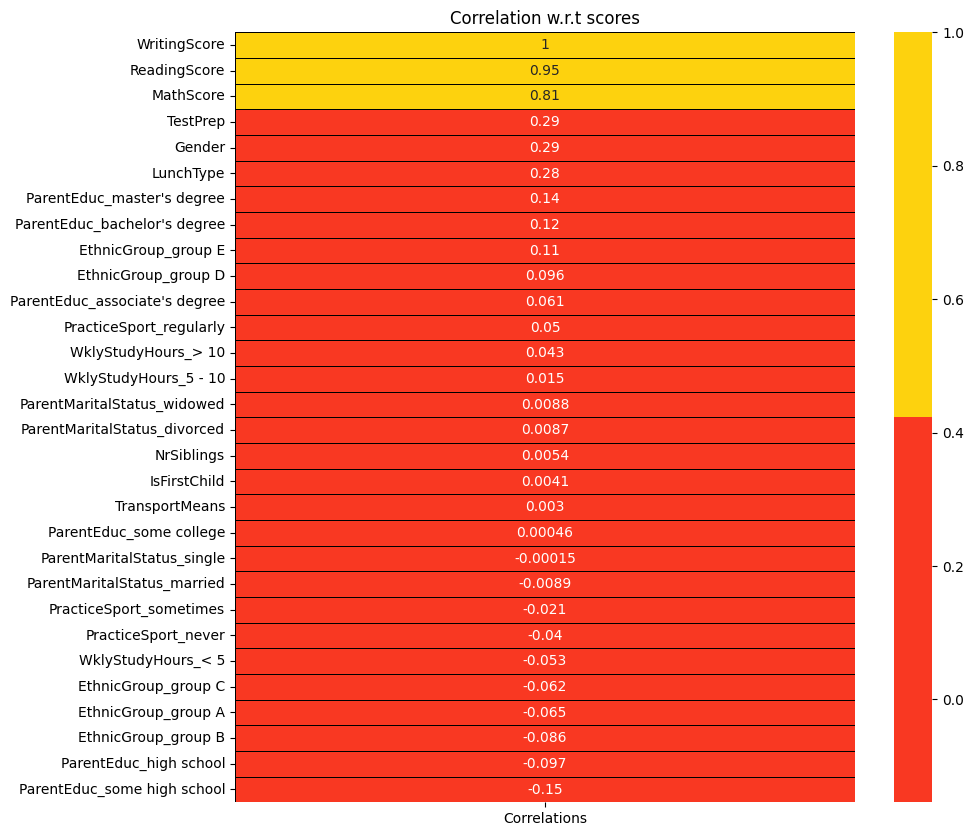

In [42]:
corr = data.corrwith(data['WritingScore']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot= True, cmap=colors, linewidths = 0.4, linecolor = 'black')
plt.title('Correlation w.r.t scores')

# Testing the model

In [43]:
features = ['Gender', 'LunchType', 'TestPrep']
label = ['ReadingScore']
X = data[features]
X.head()

y = data[label]
y

,ReadingScore
2,93
4,78
5,84
6,93
7,43
...,...
30635,53
30636,61
30637,53
30639,90


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.2, random_state = 42)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16212 entries, 9278 to 23901
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Gender     16212 non-null  int64
 1   LunchType  16212 non-null  int64
 2   TestPrep   16212 non-null  int64
dtypes: int64(3)
memory usage: 506.6 KB


## Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
print(lr.intercept_)

[58.49883403]


In [51]:
print(lr.coef_)

[[7.12808623 8.10928214 6.27263304]]
